***
# Assignment 1 Social Graphs 2023

**Link to assignment description:** https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/assignments/Assignment1.ipynb
***

## Table of Contents
* [0. Requirements](#binning)
* [1. Binning degree distributions](#watts)
* [2. Random networks and plotting in `networkx`](#randomnetworks)
* [3. Watts-Strogatz Networks](#watts)
* [4. The Barabasi-Albert Model](#barabasi)
* [5. Power-laws and the friendship paradox](#powerlaws)
* [6. Configuration-model networks](#configuration)
* [7. Contributions](#contributions)
* [8. References](#references)

## 0. Requirements <a class="anchor" id="requirements"></a>

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

## 1. Binning degree distributions <a class="anchor" id="binning"></a>


Generating 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$:

In [48]:
data = np.random.normal(2, 0.125, 5000)

Binning the data:

In [49]:
counts, bins = np.histogram(data, 10)

The function `numpy.histogram` returns two arrays. The first array contains the number of data points in each bin, while the second array provides the edges of the bins.

The two arrays do not have the same length. This is because the first array contains a value for each bin, whereas the second array lists both the starting and ending values for each bin—representing the edges.

Plotting the binned data:

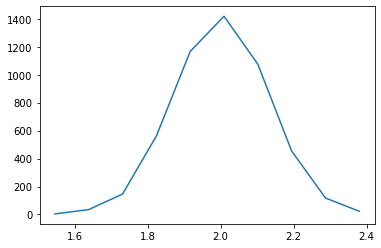

In [50]:
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.plot(bin_centers, counts)
plt.show()

The `bin_centers` list contains the center of each bin. This is calculated by first adding the starting and ending edges of each bin, represented by `bins[:-1]` and `bins[1:]` respectively, and then dividing the sum by two.

---

Generating 5000 datapoints from a Poisson distribution with $\lambda = 10$:

In [51]:
data = np.random.poisson(10, 5000)
data_min, data_max = data.min(), data.max()
data_min, data_max

(0, 23)

Creating the vector `v`:

In [52]:
v = np.arange(data_min, data_max + 1)
counts, bins = np.histogram(data, v)

The sum of the bin counts is 5000, that is the total number of binned data points.

The first element of `v` represents the starting edge of the first bin, i.e., the minimum data point value. The last element of `v` denotes the ending edge of the last bin, i.e., the maximum data point value.

Plotting the binned data:

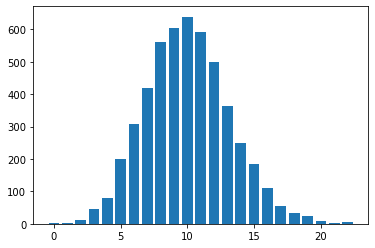

In [53]:
plt.bar(bins[:-1], counts)
plt.show()

---

Finding p for the ER network:

In [54]:
N = 5000
k = 10
p = k / (N-1) # k = p(N-1)

Generating the ER network graph:

In [55]:
G = nx.erdos_renyi_graph(N, p)

Binning the data:

In [56]:
degrees = [degree for node, degree in G.degree()]
counts = np.bincount(degrees)

Plotting the binned data:

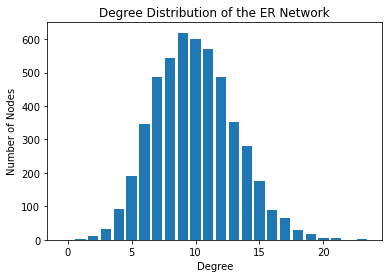

In [57]:
plt.bar(range(len(counts)), counts)
plt.title("Degree Distribution of the ER Network")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()

># 2. Random networks and plotting in `networkx` <a class="anchor" id="randomnetworks"></a>

### Exercise 3.1
In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.


 As the expected number of links is given by: $⟨L⟩ = \frac{pN(N-1)}{2}$, then in our case we will have:

In [58]:
N = 3000
p = 10**-3

l = (p*N*(N-1))/2
print(f"The expected number of links is {l}")

The expected number of links is 4498.5


Now we calculate the Average Degree: $⟨k⟩=p(N-1)$

In [59]:
k = p*(N-1)
print(f"The average degree of the network is ⟨k⟩= {k}")

The average degree of the network is ⟨k⟩= 2.999


In [60]:
x = 0 < k < 1 
print(f"Is network in subcritical regime? {x}")

Is network in subcritical regime? False


In [61]:
x = k == 1 
print(f"Is network in critical point regime? {x}")

Is network in critical point regime? False


As $⟨k⟩=2.99$ we can see that the network is neither subcrtical nor critical point, then it can be either supercritical or connected. Therefore, we have to check of ot is connected, so we should validate that  $k > lnN$.

In [62]:
x = p>1/N 
print(f"Is network in supercritical regime? {x}")

Is network in supercritical regime? True


In [63]:
x = k > np.log(N) 
print(f"Is network in connected regime? {x}")

Is network in connected regime? False


The network is in the **Supercritical Regime.** Also,to prove this point we can also see that the values for p and N are satisfying this inequality $p>1/N$.

In [64]:
p= 1/N
print(f'The probability of the network to be at the critical point is {p:.6f}') 

The probability of the network to be at the critical point is 0.000333


Find the critical number of nodes, denoted as $N^{cr}$, needed to ensure that the network forms a single component when the linking probability, represented as p, is equal to 10^(-3).

As per the book's information, when the average degree $⟨k⟩$ exceeds the natural logarithm of the number of nodes, i.e., $⟨k⟩ > lnN$, all components merge into the giant component, resulting in a single connected network.

Given that the average degree is calculated as $⟨k⟩ = p(N-1)$, and considering $⟨k⟩ > lnN$, we can solve the inequality $10^{-3}(N-1) > lnN$ to determine that $N^{cr}$ must be greater than 9119.13. Therefore, the minimum number of nodes required for the network to have a single component is 9120.

**Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).**

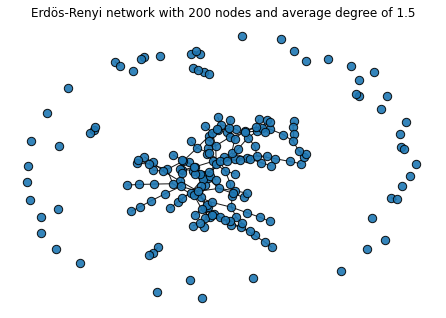

In [68]:
N = 200 
k = 1.5
p = k/(N-1)

G = nx.gnp_random_graph(N, p)
nx.draw(G, node_size=70, alpha=0.9, with_labels=False,  edgecolors='k')
plt.title(f"Erdös-Renyi network with {N} nodes and average degree of {k}")
plt.show()

 * **Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)**


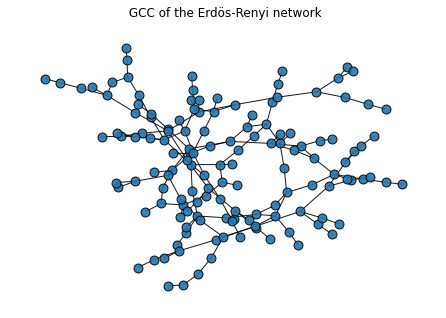

In [69]:
gcc = max(nx.connected_components(G), key=len)
G_gcc = G.subgraph(gcc)
nx.draw(G_gcc, node_size=80, alpha=0.9, with_labels=False,  edgecolors='k')
plt.title(f" GCC of the Erdös-Renyi network")
plt.show()

 * **Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)**

In [70]:
gccnode = random.choice(list(gcc))
print(f'The node chosen at random is: {gccnode}') 

The node chosen at random is: 7


  * **Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)**


In [71]:
paths =  nx.single_source_shortest_path_length(G_gcc, source=gccnode)
two_steps = []
for node, length in paths.items():
    if length == 2:
        two_steps.append(node)
print(f'The nodes that are 2 steps away are: {two_steps}')

The nodes that are 2 steps away are: [99, 24, 36, 49, 100, 29, 92, 94]


  * **Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.**

To establish node colors within the GCC (Giant Connected Component) graph, we design a function called node_color. In this function, the node's index is associated with a specific color. Accordingly, the node located at the index referred to as gcc_node (the initial node selected earlier) is assigned the color black ("#000000"). Nodes that are identified as being 2 steps away, as indicated by their indexes present in the two_node_steps list, are colored red ("#ff0000"). All other nodes are colored blue ("#A0CBE2") in the graph.

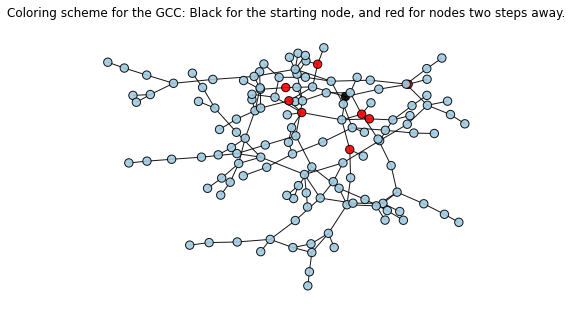

In [73]:
def node_color(node_index):
    if node_index == gccnode: return "#000000"
    elif node_index in two_steps: return "#ff0000"
    else: return "#A0CBE2"
    
node_colors = list(map(lambda node: node_color(node), G_gcc.nodes()))

nx.draw(G_gcc, node_color=node_colors, node_size=70, alpha=0.9, with_labels=False, edgecolors='k')
plt.title(f"Coloring scheme for the GCC: Black for the starting node, and red for nodes two steps away.")
plt.show()

## 3. Watts-Strogatz Networks <a class="anchor" id="watts"></a>


In [26]:
# graph parameters
N = 500 
k = 4
p_values = [0., 0.1, 1.]

# list to store avg shortest path lengths
avg_shortest_paths = []

for p in p_values:
    G = nx.watts_strogatz_graph(N, k, p)
    avg_d = nx.average_shortest_path_length(G)
    avg_shortest_paths.append(avg_d)

for p, d in zip(p_values, avg_shortest_paths):
    print(f"For p = {p}, the average shortest path length <d> is {d:.4f}")

For p = 0.0, the average shortest path length <d> is 62.8758
For p = 0.1, the average shortest path length <d> is 8.0889
For p = 1.0, the average shortest path length <d> is 4.7806


When $p=1$ the network becomes a random network, i.e. all edges are rewired randomly. This will lead to the small-world phenomenon (low average shorterst path lengths).

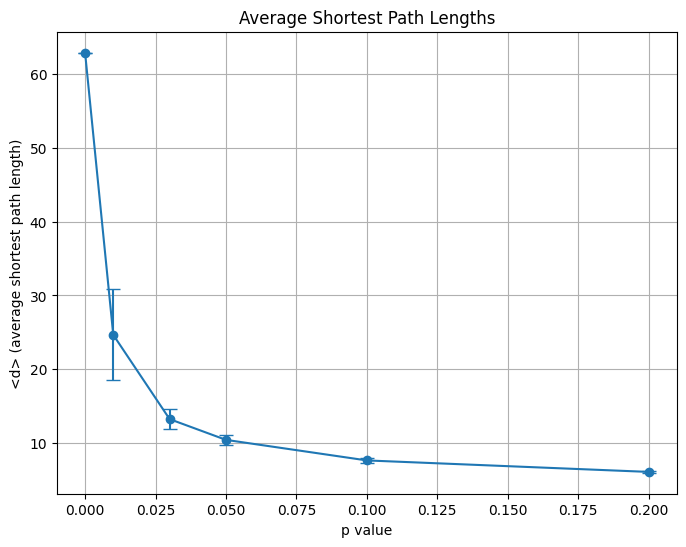

In [30]:
p_values = [0., 0.01, 0.03, 0.05, 0.1, 0.2]
avg_d_values = []
std_values = []

# exploring the WS model with different p_values
for p in p_values:
    path_lengths = []
    # generating and finding avg shortest path length in 50 WS networks
    for _ in range(50):
        G = nx.watts_strogatz_graph(N, k, p)
        avg_d = nx.average_shortest_path_length(G)
        path_lengths.append(avg_d)
    
    avg_d_values.append(np.mean(path_lengths))
    std_values.append(np.std(path_lengths))

# Plotting
plt.figure(figsize=(8,6))
plt.errorbar(p_values, avg_d_values, yerr=std_values, marker='o', capsize=5)
plt.title('Average Shortest Path Lengths')
plt.xlabel('p value')
plt.ylabel('<d> (average shortest path length)')
plt.grid(True)
plt.show()

In the plot we see the standard deviations of the average shortest path length for different values of p. We see that the average shortest path length (and thus standard deviation) decreases rapidly for each small increase in p. This further illustrates the small world property of the WS model.

## 4. The Barabasi-Albert Model <a class="anchor" id="barabasi"></a>

Generating a 100 node BA network graph:

In [43]:
def BA_graph(n):
    G = nx.Graph()
    G.add_edge(0, 1)

    for i in range(2, n):
        nodes = []
        
        for edge in G.edges():
            for node in edge:
                nodes.append(node)

        random_node = random.choice(nodes)
        G.add_edge(i, random_node)

    return G

In [15]:
G = BA_graph(100)

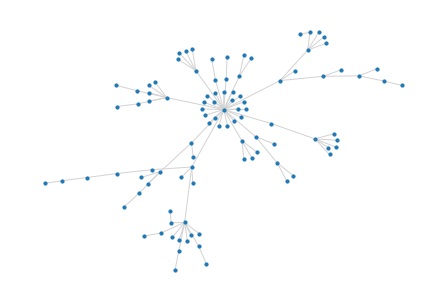

In [16]:
nx.draw(G, with_labels=False, edge_color='lightgrey', node_size=10)
plt.show()

---

Generating a 5000 node BA network graph:

In [17]:
G = BA_graph(5000)

In [18]:
degrees = [degree for node, degree in G.degree()]
degrees_min, degrees_max = min(degrees), max(degrees)
degrees_min, degrees_max

(1, 174)

Binning the data:

In [19]:
degrees, counts = np.unique(degrees, return_counts=True)

Plotting the binned data:

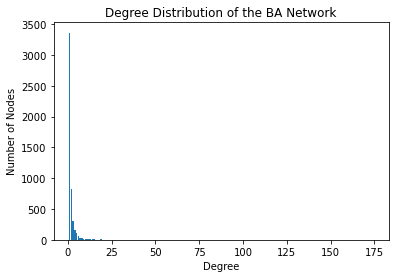

In [20]:
plt.bar(degrees, counts)
plt.title("Degree Distribution of the BA Network")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()

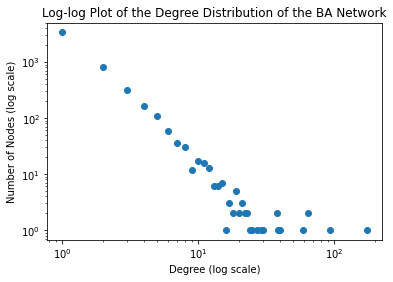

In [21]:
plt.loglog(degrees, counts, 'o')
plt.title("Log-log Plot of the Degree Distribution of the BA Network")
plt.xlabel('Degree (log scale)')
plt.ylabel('Number of Nodes (log scale)')
plt.show()

> ## 5. Power-laws and the friendship paradox <a class="anchor" id="powerlaws"></a>


Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

In [23]:
ran_node = np.random.choice(list(G.nodes))
print(f"Picked random node is: {ran_node}")
degree_i = dict(G.degree([ran_node]))[ran_node] 
print(f"{ran_node} has {degree_i} friend(s), the average degree of {ran_node} is {degree_i}")

Picked random node is: 1548
1548 has 1 friend(s), the average degree of 1548 is 1


In [27]:
neighbors = list(G.neighbors(ran_node))
print(f"The neighbors of {ran_node} are: {neighbors}")

The neighbors of 1548 are: [1362]


In [32]:
degree = dict(G.degree(neighbors))
print(f"The degree of all neighbors of {ran_node} is:\n{degree}")

The degree of all neighbors of 1548 is:
{1362: 3}


1548 friends have an average of 3 friends, the average degree of 1362's neighbors is 3


* **Compare the two numbers to check if it's true that  𝑖 's friends (on average) have more friends than  𝑖 .**

In [36]:
avg_degree = np.average(list(dict(degree).values())) 
if avg_degree > degree_i:
    print(f"The friendship paradox for  i={ran_node} is TRUE")
else:
    print(f"The friendship paradox for  i={ran_node} is FALSE")

The friendship paradox for  i=1548 is TRUE


* **Do this 1000 times. How many out of those 1000 times is the friendship paradox true?**


To investigate the validity of the friendship paradox, a random sample of 1000 nodes is chosen, and their individual degrees as well as the average degree of their neighbors are computed. Using these degree values, we assess whether the friendship paradox holds, which means determining whether the average degree of a node's neighbors exceeds the node's own average degree. Subsequently, we create visual representations of the truth distribution and percentage distribution for better clarity.

In [41]:
N = 1000

paradox = []

for _ in range(N):
    ran_node = np.random.choice(list(G.nodes))
    neighbors = list(G.neighbors(ran_node)) 
    
    avg_degree_neighbors = np.average(list(dict(G.degree(neighbors)).values()))

    paradox.append(len(neighbors) < avg_degree_neighbors)


true = sum(paradox)
false= N - true

print(f"There are {true} instances where the average number of friends among i's acquaintances surpasses i's own number of friends.")
print(f"There are {false} instances where i possesses more friends than i's friends do.")
print(f"The friendship paradox is true {true/10}% of the times")

There are 857 instances where the average number of friends among i's acquaintances surpasses i's own number of friends.
There are 143 instances where i possesses more friends than i's friends do.
The friendship paradox is true 85.7% of the times


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


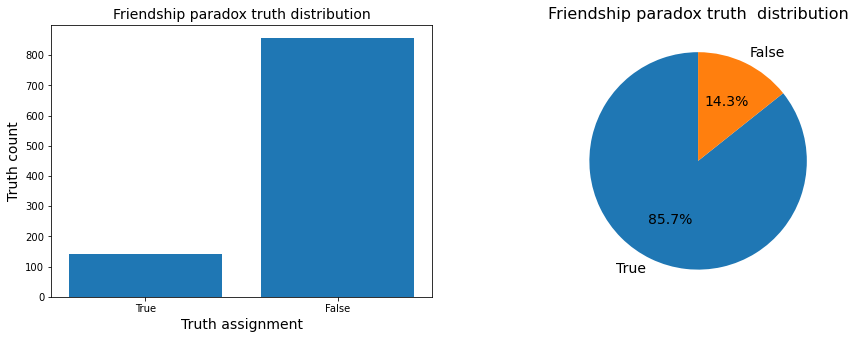

In [85]:
fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(15,5))

labels = ['True', 'False']
y, bins = np.histogram(paradox, 2)

ax.bar(labels, y)
ax.set_title("Friendship paradox truth distribution", fontsize=14)
ax.set_ylabel("Truth count", fontsize=14)
ax.set_xlabel("Truth assignment", fontsize=14)

ax1.pie([true,false], startangle=90, labels=labels, autopct='%.1f%%', textprops={'fontsize': 14})
ax1.set_title("Friendship paradox truth  distribution", fontsize=16)

plt.show()

**Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.**

To construct a Barabási-Albert network using the growth mechanism, we initially introduce two nodes connected by an edge. The process of expanding the BA network continues until we reach a total of 5000 nodes. Initially, we generate 5000 nodes, and subsequently, we proceed to iterate through this set of newly created nodes. During each iteration, we choose a node denoted as $node_i$, and then, we expand the network by establishing a connection between $node_i$ and another node chosen randomly from the existing nodes in the network.

In [78]:

def BA_graph(n):
    G1 = nx.Graph()
    G1.add_edge(0, 1)

    for i in range(2, n):
        nodes = []
        
        for edge in G1.edges():
            for node in edge:
                nodes.append(node)

        random_node = random.choice(nodes)
        G1.add_edge(i, random_node)

    return G1

node = np.random.choice(list(G1.nodes))
G1 = BA_graph(5000)

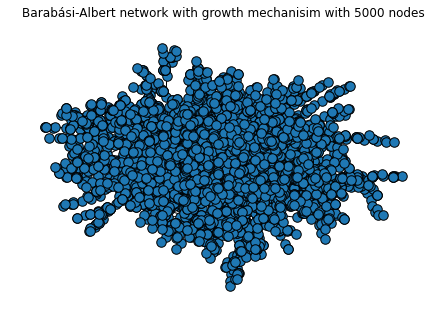

In [80]:
nx.draw_spring(G1, node_size=90, node_shape='o', with_labels=False,edgecolors='k') 
plt.title("Barabási-Albert network with growth mechanisim with 5000 nodes")
plt.show()

* **Compare to the ER network of same size and same  𝑝 . What are the differences? Explain in your own words. Hint: To get started, take a look at the degree distribution, and study the number of connected components.**

To construct the ER network, we must determine the value of "p." We achieve this by initially computing the average degree of the network that has been previously established. Then, we utilize the formula $\langle p \rangle = k / (N-1)$ to calculate the appropriate value for "p."

In [81]:
N = 5000
k_growth = np.average(list(dict(G1.degree).values())) 
p = k_growth/(N - 1)

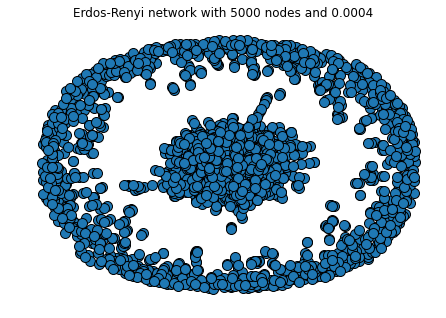

In [82]:
G_ER = nx.erdos_renyi_graph(N, p)
k_ER = np.average(list(dict(G_ER.degree).values())) 
nx.draw_spring(G_ER, node_size=100,  node_shape='o', with_labels=False, edgecolors='k') 
plt.title(f"Erdos-Renyi network with {N} nodes and {p}")
plt.show()

The graphs clearly illustrate that the Barabási-Albert network forms a single connected component, whereas the Erdos-Renyi network consists of multiple connected components. This distinction arises from the fundamental differences in how these networks are constructed.

In Erdos-Renyi networks, links between nodes are established with a fixed probability 'p,' leading to a potential wide range of node degrees and the presence of various connected components. In contrast, Barabasi-Albert networks commence with a small group of interconnected nodes. Subsequently, new nodes are added by connecting them to existing nodes with a probability proportional to the degree of those existing nodes. Consequently, since the initial network is connected, the resulting network remains connected as well.

To reinforce this concept, we calculate and compare the number of connected components in each network.

In [84]:
print(f"Count of connected segments in the BA-network employing the growth mechanism: {nx.number_connected_components(G1)}")
print(f"Count of connectivity groupings in the ER network: {nx.number_connected_components(G_ER)}")

Count of connected segments in the BA-network employing the growth mechanism: 1
Count of connectivity groupings in the ER network: 877


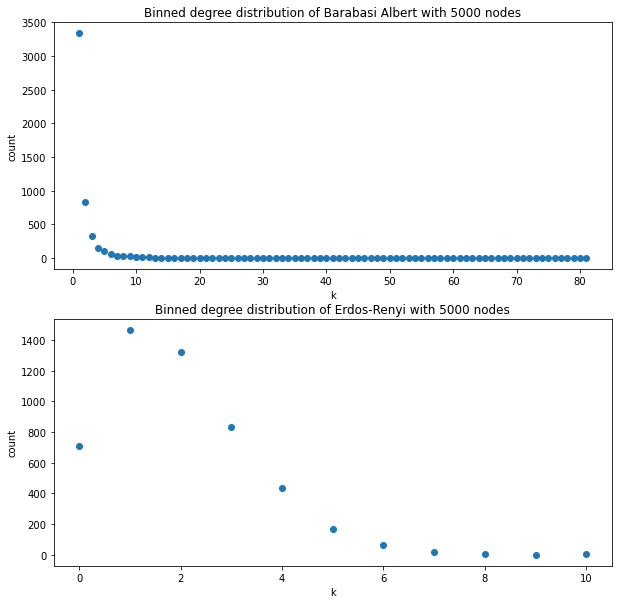

In [87]:
def plot_binned_degree_distribution(G1):
    degree = list(dict(G1.degree()).values())
    max_degree = max(degree)
    min_degree = min(degree)

    v = np.arange(min_degree-0.5, max_degree+1.5)
    bins_count, bins = np.histogram(degree, v)

    bins_new = []
    for index, value in enumerate(bins[0:-1]):
        avg = np.mean((value, bins[index+1]))
        bins_new.append(avg)
    
    return bins_new, bins_count

ba_bins_new, ba_bins_count = plot_binned_degree_distribution(G1)
er_bins_new, er_bins_count = plot_binned_degree_distribution(G_ER)
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(10, 10))

ax0.scatter(ba_bins_new, ba_bins_count)
ax0.set_title('Binned degree distribution of Barabasi Albert with 5000 nodes')
ax0.set_xlabel("k", fontsize=10)
ax0.set_ylabel("count", fontsize=10)

ax1.scatter(er_bins_new, er_bins_count)
ax1.set_title('Binned degree distribution of Erdos-Renyi with 5000 nodes')
ax1.set_xlabel("k", fontsize=10)
ax1.set_ylabel("count", fontsize=10)

plt.show()

## 6. Configuration-model networks <a class="anchor" id="configuration"></a>

In [34]:
# Extract the degree sequence from the G graph
degree_sequence_BA = [degree for node, degree in G.degree()]
degree_sequence_BA

[4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 6,
 6,
 5,
 6,
 4,
 4,
 4,
 3,
 5,
 2,
 3,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 5,
 4,
 2,
 5,
 5,
 4,
 5,
 4,
 5,
 3,
 4,
 3,
 4,
 4,
 5,
 4,
 3,
 6,
 6,
 4,
 4,
 3,
 3,
 3,
 6,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 5,
 4,
 4,
 4,
 4,
 2,
 5,
 3,
 4,
 4,
 4,
 6,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 5,
 6,
 3,
 4,
 2,
 5,
 2,
 4,
 4,
 5,
 4,
 5,
 4,
 6,
 3,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 3,
 4,
 2,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 5,
 5,
 4,
 5,
 5,
 4,
 4,
 3,
 4,
 5,
 5,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 3,
 4,
 3,
 3,
 5,
 6,
 3,
 4,
 4,
 4,
 5,
 5,
 3,
 6,
 6,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 6,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 2,
 4,
 3,
 4,
 3,
 4,
 4,
 3,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 6,
 5,
 3,
 3,
 2,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 2,
 4,
 3,
 3,
 3,
 6,
 4,


In [36]:
# create configuration-model with function from week 3
def configuration_model(degrees):
    
    halfedges = []  # a list of halfedges
    
    for i, k in enumerate(degrees):
        halfedges.extend([i] * k)

    np.random.shuffle(halfedges)
    
    edgelist = []
    for i in range(0, len(halfedges), 2):
        edgelist.append((halfedges[i], halfedges[i+1]))
    
    return edgelist

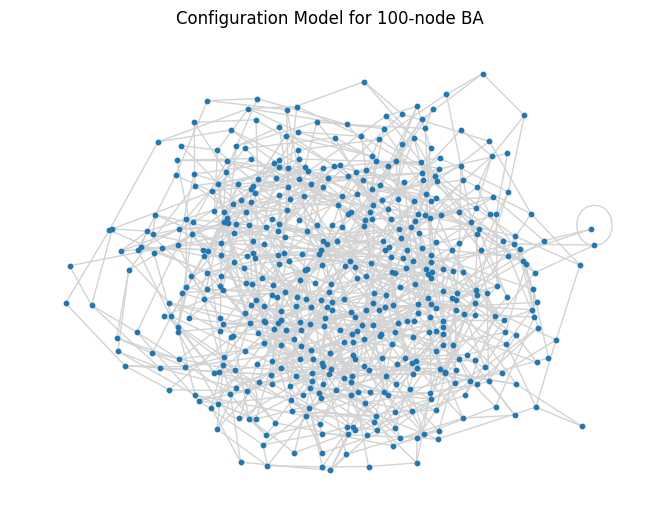

In [46]:
# use the function to create a configuration- model
# for the 100 node BA degree sequence
edgelist_100BA = configuration_model(degree_sequence_BA)
G_config = nx.Graph(edgelist_100BA)
nx.draw(G_config, with_labels=False, edge_color='lightgreY', node_size=10)
plt.title("Configuration Model for 100-node BA")
plt.show()

We notice that compared to the BA network, the configuration model network looks more random. This is explained by the preferential attachment of the BA network that leads to hubs. The configuration model just uses the degree sequence without the preferential attachment. 

In [47]:
# creating 5000 node configuration-model network
# half of the nodes have degree 3 and the other half have degree 5
degrees_5000 = [3] * 2500 + [5] * 2500
edgelist_5000 = configuration_model(degrees_5000)
G_config_5000 = nx.Graph(edgelist_5000)

In [58]:
sum_of_degrees = (3 * 2500) + (5 * 2500)
print(f"expected sum of degrees is: {sum_of_degrees}")

expected sum of degrees is: 20000


In [49]:
actual_degrees = [degree for node, degree in G_config_5000.degree()]
actual_sum_of_degrees = sum(actual_degrees)
print(f"The actual sum of degrees is: {actual_sum_of_degrees}")

The actual sum of degrees is: 19998


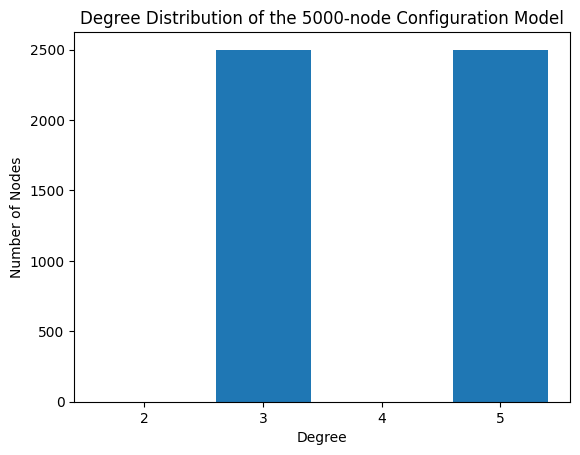

In [57]:
degrees, counts = np.unique(actual_degrees, return_counts=True)
plt.bar(degrees, counts, )
plt.title("Degree Distribution of the 5000-node Configuration Model")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.xticks(np.arange(min(degrees), max(degrees)+1, 1.0))
plt.show()

## 7. Contributions. Who did what? <a class="anchor" id="contributions"></a>

**s194718**
- 1
- 4

**194768**
- 2
- 5

**s223730**
- 3
- 6


## 8. References <a class="anchor" id="references"></a>